In [ ]:
import pandas as pd
import os
df = pd.read_csv('C:/Users/YASHRA/Downloads/Billionaires_Statistics.csv.csv')
print(df.head(10))


   rank  finalWorth               category                 personName   age  \
0     1      211000       Fashion & Retail   Bernard Arnault & family  74.0   
1     2      180000             Automotive                  Elon Musk  51.0   
2     3      114000             Technology                 Jeff Bezos  59.0   
3     4      107000             Technology              Larry Ellison  78.0   
4     5      106000  Finance & Investments             Warren Buffett  92.0   
5     6      104000             Technology                 Bill Gates  67.0   
6     7       94500  Media & Entertainment          Michael Bloomberg  81.0   
7     8       93000                Telecom  Carlos Slim Helu & family  83.0   
8     9       83400            Diversified              Mukesh Ambani  65.0   
9    10       80700             Technology              Steve Ballmer  67.0   

         country         city              source             industries  \
0         France        Paris                LVMH     

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import os
warnings.filterwarnings('ignore')

df.isnull().sum()
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [21]:
# Data Cleaning & Preprocessing
# ---------------------------

# Convert GDP to numeric (remove commas, $ signs)
df['gdp_country'] = df['gdp_country'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Convert relevant columns to category
df['country'] = df['country'].astype('category')
df['gender'] = df['gender'].astype('category')
df['category'] = df['category'].astype('category')
df['status'] = df['status'].astype('category')

# Fill missing age with mean
df['age'] = df['age'].fillna(df['age'].mean())


# Calculate exact age if birthYear is present and year of data assumed as 2023
if 'birthYear' in df.columns:
    df['birthYear'] = pd.to_numeric(df['birthYear'], errors='coerce')
    df['calculated_age'] = 2023 - df['birthYear']
    df['age'] = df['age'].fillna(df['calculated_age'])

# Clean and convert numeric columns
numeric_cols = ['finalWorth', 'life_expectancy_country', 'tax_revenue_country_country',
                'total_tax_rate_country', 'population_country', 'cpi_change_country']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


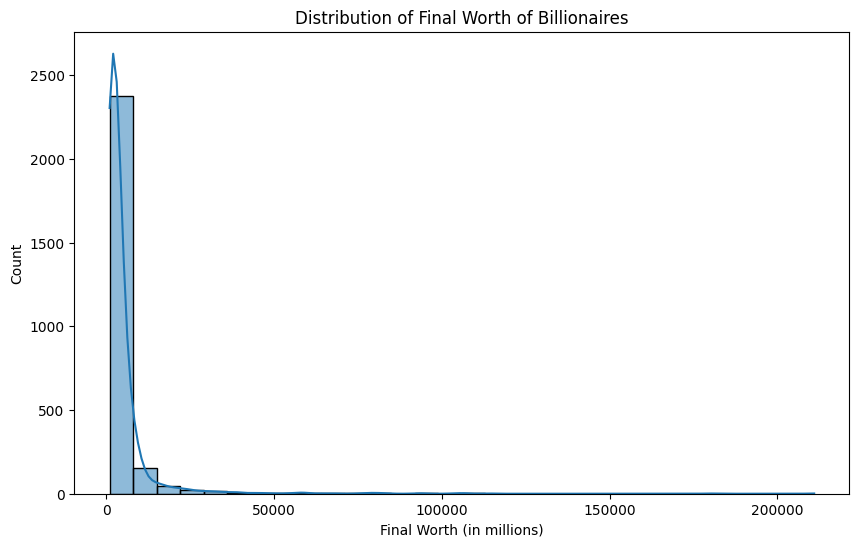

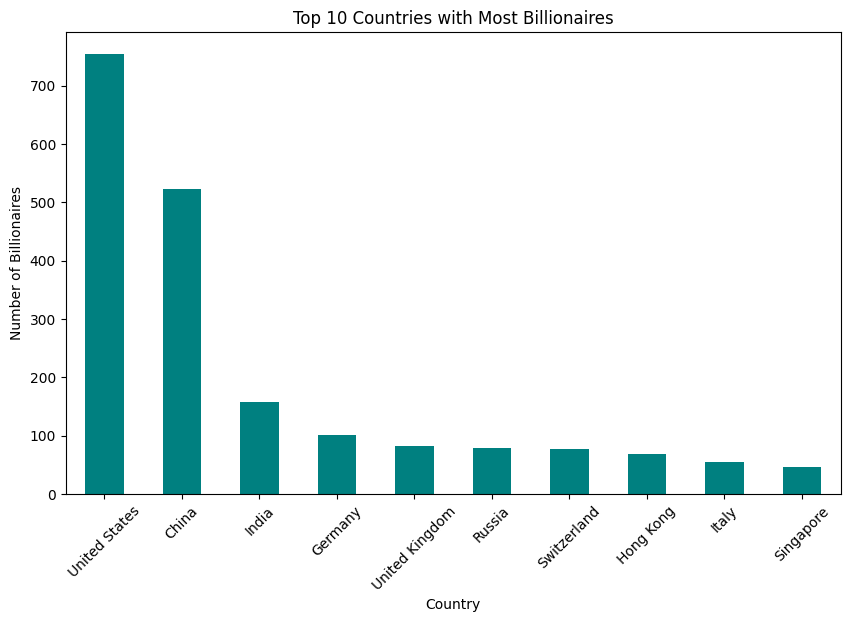

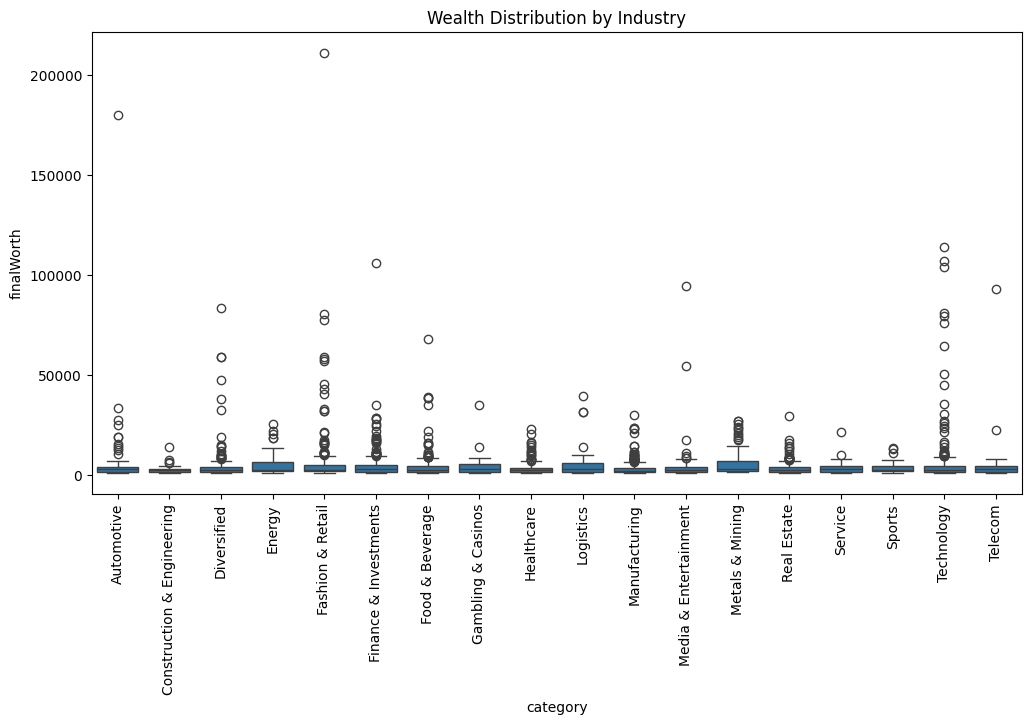

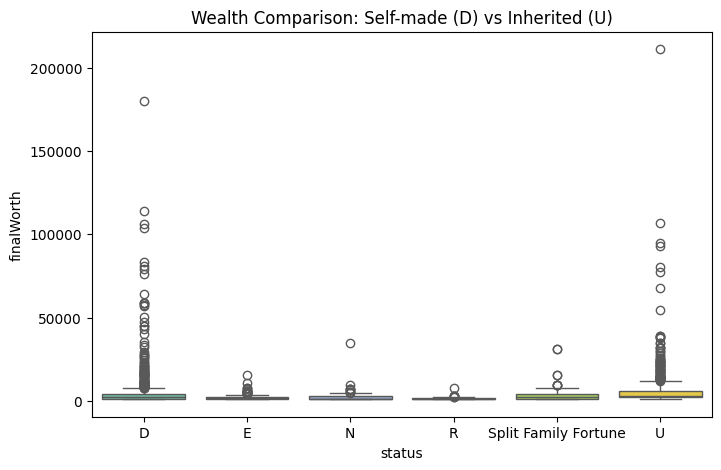

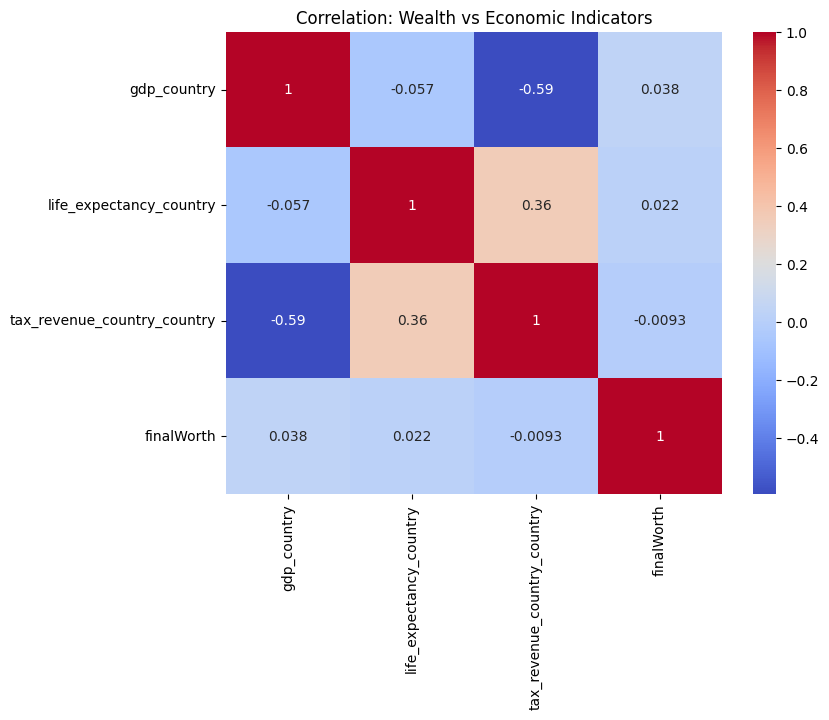

In [22]:
# Exploratory Data Analysis
# ---------------------------

# Wealth distribution
plt.figure(figsize=(10,6))
sns.histplot(df['finalWorth'], bins=30, kde=True)
plt.title('Distribution of Final Worth of Billionaires')
plt.xlabel('Final Worth (in millions)')
plt.ylabel('Count')
plt.show()

# Top 10 countries by billionaire count
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries with Most Billionaires')
plt.ylabel('Number of Billionaires')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# Industry analysis
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='category', y='finalWorth')
plt.xticks(rotation=90)
plt.title('Wealth Distribution by Industry')
plt.show()

# Self-made vs Inherited
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='status', y='finalWorth', palette='Set2')
plt.title('Wealth Comparison: Self-made (D) vs Inherited (U)')
plt.show()

# Correlation with economic factors
econ_factors = ['gdp_country', 'life_expectancy_country', 'tax_revenue_country_country', 'finalWorth']
plt.figure(figsize=(8,6))
sns.heatmap(df[econ_factors].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Wealth vs Economic Indicators')
plt.show()

In [23]:
# Save the cleaned dataset
df.to_csv("cleaned_billionaires.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_billionaires.csv' in the current directory.")


Cleaned dataset saved as 'cleaned_billionaires.csv' in the current directory.


In [27]:
! pip install sqlalchemy pandas

import pandas as pd
from sqlalchemy import create_engine

# Load your cleaned CSV
df = pd.read_csv('C:/Users/YASHRA/Downloads/Billionaires_Statistics.csv.csv')

# Create SQLite engine (you can replace with MySQL/PostgreSQL if needed)
engine = create_engine('sqlite:///billionaires.db')  # Creates a file-based DB

# Load data into SQL table
df.to_sql('billionaires', engine, if_exists='replace', index=False)

print("Data loaded successfully into SQL database.")


Data loaded successfully into SQL database.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\YASHRA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
from sqlalchemy import create_engine
import pandas as pd

user = "root"
password = "yashra"  # Leave blank if no password
host = "localhost"
port = 3306
database = "mysql"  # Make sure this DB exists

connection_str = f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_str)

# Load your cleaned CSV into SQL
df = pd.read_csv("cleaned_billionaires.csv")
df.to_sql("billionaires", con=engine, if_exists="replace", index=False)

print("Data loaded successfully into SQL database.")


Data loaded successfully into SQL database.


In [10]:
query = "SELECT country, AVG(finalWorth) as avg_wealth FROM billionaires GROUP BY country ORDER BY avg_wealth DESC"
result = pd.read_sql(query, con=engine)

print(result.head())


      country  avg_wealth
0  Uzbekistan  14400.0000
1      France  14271.4286
2     Belgium  13733.3333
3      Mexico  12746.1538
4     Nigeria   9500.0000


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Your MySQL credentials
user = "root"  # or your actual username
password = "yashra"
host = "localhost"
port = 3306
database = "billionaires_db"  # make sure this DB exists

connection_str = f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine = create_engine(connection_str)

# Test connection
try:
    with engine.connect() as conn:
        print("✅ Connection to MySQL successful!")
except Exception as e:
    print("❌ Failed to connect to MySQL")
    print(e)

✅ Connection to MySQL successful!


In [12]:
# Load your cleaned CSV file
df = pd.read_csv("cleaned_billionaires.csv")

# Upload to SQL (will auto-create a table named 'billionaires_data')
df.to_sql(name='billionaires_data', con=engine, if_exists='replace', index=False)

print("✅ Data uploaded to MySQL and table created!")

✅ Data uploaded to MySQL and table created!
